In [1]:
import json
import pandas as pd
from pathlib import Path

检查数据构造

In [85]:
train_data_path = Path('./ccks_8_data_v2/train')

In [100]:
with open(train_data_path/f'train_V2_400.json') as f:
        data = json.load(f)

In [101]:
text = data['originalText'];text

'太阳能无人机将采用薄膜太阳能电池和备用蓄电池以支持全天时飞行?该无人机的一个显著特点是在机翼末端放置螺旋桨,以节省能源?无人机飞行的持续时间估计为几周?高空“伪卫星”无人机的可能有效载荷为:通信中继器?拍照录像设备以及气象设备?'

In [102]:
ens = data['entities'];ens

[{'label_type': '试验要素', 'overlap': 0, 'start_pos': 1, 'end_pos': 6},
 {'label_type': '试验要素', 'overlap': 0, 'start_pos': 77, 'end_pos': 86},
 {'label_type': '性能指标', 'overlap': 0, 'start_pos': 26, 'end_pos': 28},
 {'label_type': '性能指标', 'overlap': 0, 'start_pos': 67, 'end_pos': 70},
 {'label_type': '性能指标', 'overlap': 0, 'start_pos': 90, 'end_pos': 93},
 {'label_type': '系统组成', 'overlap': 0, 'start_pos': 10, 'end_pos': 16},
 {'label_type': '系统组成', 'overlap': 0, 'start_pos': 18, 'end_pos': 22},
 {'label_type': '系统组成', 'overlap': 0, 'start_pos': 45, 'end_pos': 48},
 {'label_type': '系统组成', 'overlap': 0, 'start_pos': 51, 'end_pos': 53},
 {'label_type': '系统组成', 'overlap': 0, 'start_pos': 96, 'end_pos': 100},
 {'label_type': '系统组成', 'overlap': 0, 'start_pos': 102, 'end_pos': 107},
 {'label_type': '系统组成', 'overlap': 0, 'start_pos': 110, 'end_pos': 113}]

In [103]:
text = text.strip().replace('\r\n', 'r').replace(' ', 'r')

In [105]:
text[1-1:6]

'太阳能无人机'

判断是否有实体标注重叠

In [14]:
train_data_path = Path('./ccks_8_data_v2/train')

In [15]:
for idx in range(1, 401):
    with open(train_data_path/f'train_V2_{idx}.json') as f:
            data = json.load(f)
            for entity in data['entities']:
                if entity['overlap'] != 0:
                    print(idx)

观察实体长度

In [106]:
from collections import Counter

In [107]:
enti_len_list = []
for idx in range(1, 401):
    with open(train_data_path/f'train_V2_{idx}.json') as f:
            data = json.load(f)
            for entity in data['entities']:
                enti_len = entity['end_pos'] - entity['start_pos'] + 1
                enti_len_list.append(enti_len)

In [108]:
src = Counter(enti_len_list)

查看长度为一的实体

In [114]:
enti_len_list = []
for idx in range(1, 401):
    with open(train_data_path/f'train_V2_{idx}.json') as f:
            data = json.load(f)
            text = data['originalText']
            for entity in data['entities']:
                enti_len = entity['end_pos'] - entity['start_pos'] + 1
                if enti_len==1:
                    type = entity['label_type']
                    en = text[entity['end_pos']-1]
                    enti_len_list.append({type:en})

In [115]:
enti_len_list

[{'性能指标': '长'},
 {'性能指标': '重'},
 {'性能指标': '重'},
 {'性能指标': '长'},
 {'性能指标': '重'},
 {'性能指标': '深'},
 {'性能指标': '长'},
 {'性能指标': '重'},
 {'性能指标': '重'},
 {'性能指标': '长'},
 {'性能指标': '重'},
 {'性能指标': '深'},
 {'性能指标': '快'},
 {'性能指标': '长'},
 {'性能指标': '长'},
 {'性能指标': '重'},
 {'性能指标': '重'},
 {'任务场景': '俄'},
 {'性能指标': '高'},
 {'试验要素': '火'},
 {'试验要素': '烟'},
 {'性能指标': '重'},
 {'性能指标': '长'},
 {'性能指标': '重'},
 {'系统组成': '翼'},
 {'试验要素': '车'},
 {'性能指标': '重'},
 {'性能指标': '长'},
 {'性能指标': '重'},
 {'性能指标': '重'},
 {'性能指标': '重'},
 {'性能指标': '重'}]

In [109]:
src

Counter({10: 113,
         6: 342,
         7: 181,
         9: 120,
         11: 79,
         2: 476,
         3: 271,
         4: 744,
         5: 187,
         17: 30,
         13: 74,
         15: 45,
         14: 51,
         8: 183,
         36: 2,
         19: 20,
         12: 77,
         1: 32,
         23: 11,
         33: 1,
         18: 28,
         20: 18,
         16: 33,
         27: 3,
         21: 9,
         26: 4,
         22: 9,
         24: 5,
         28: 2,
         25: 5,
         41: 2,
         29: 2,
         35: 1,
         30: 1})

In [77]:
x = []
y = []
for idx in range(50):
    y.append(src[idx])
    x.append(idx)

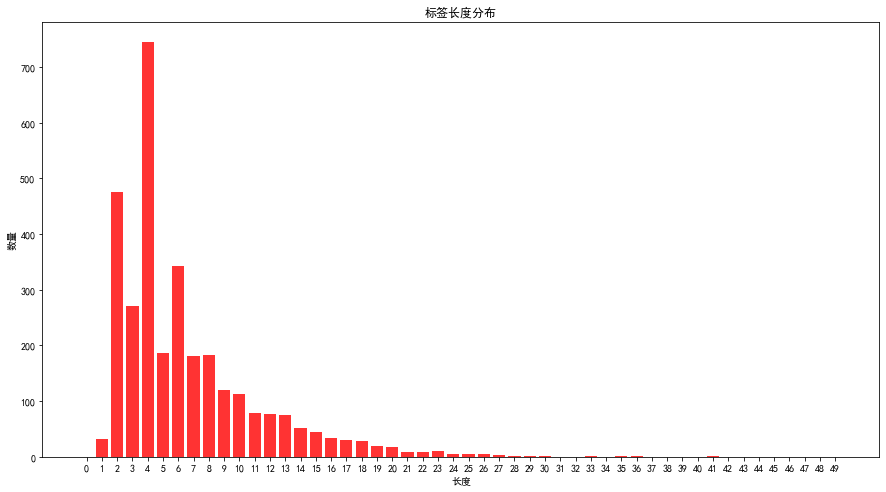

In [57]:
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

y = y
x = x
plt.figure(figsize=(15,8))
plt.bar(x, height=y, width=0.8, alpha=0.8, color='red')
plt.ylabel("数量")
plt.xlabel("长度")
plt.xticks(x, x)
plt.title("标签长度分布")
# 编辑文本
plt.show()

预测结果长度分布

In [79]:
data_path = Path('./data')

In [80]:
enti_len_list = []
with open(data_path/'submit.json') as f:
        data = json.load(f)
        for idx in range(1, 101):
            for entity in data[f"validate_V2_{idx}.json"]:
                enti_len = entity['end_pos'] - entity['start_pos'] + 1
                enti_len_list.append(enti_len)

In [81]:
pre = Counter(enti_len_list)

In [82]:
pre

Counter({7: 43,
         9: 26,
         3: 117,
         1: 10,
         5: 60,
         2: 138,
         8: 33,
         6: 84,
         13: 26,
         4: 189,
         15: 12,
         17: 9,
         10: 19,
         18: 6,
         20: 3,
         21: 6,
         22: 2,
         11: 13,
         12: 22,
         25: 3,
         28: 1,
         29: 1,
         14: 11,
         19: 6,
         16: 10,
         23: 2,
         24: 1})

In [83]:
x = []
y = []
for idx in range(50):
    y.append(pre[idx])
    x.append(idx)

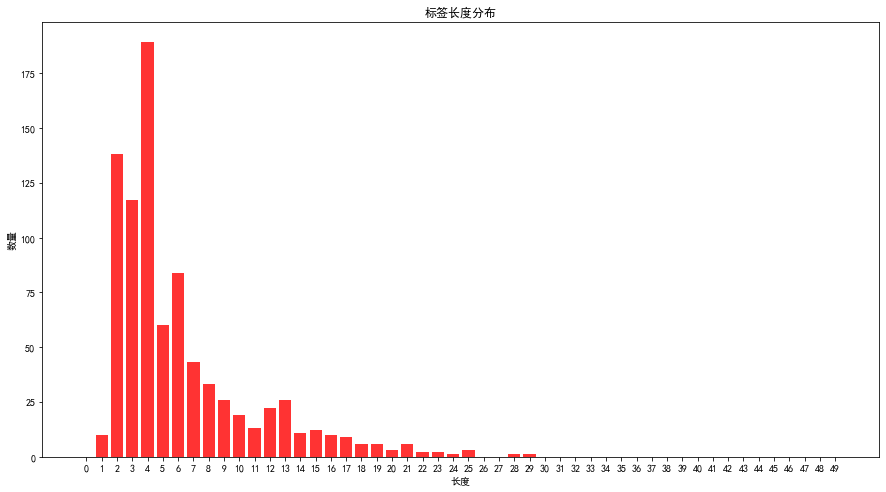

In [84]:
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

y = y
x = x
plt.figure(figsize=(15,8))
plt.bar(x, height=y, width=0.8, alpha=0.8, color='red')
plt.ylabel("数量")
plt.xlabel("长度")
plt.xticks(x, x)
plt.title("标签长度分布")
# 编辑文本
plt.show()